<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Funciones" data-toc-modified-id="Funciones-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Funciones</a></span></li><li><span><a href="#Entrenamiento" data-toc-modified-id="Entrenamiento-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Entrenamiento</a></span></li><li><span><a href="#Prediccion" data-toc-modified-id="Prediccion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prediccion</a></span></li></ul></div>

variables = {
'awnd':'avg_daily_wind_speed',
'fmtm':'time_of_fastest_mile',
'pgtm':'peak_gust_time',
'prcp':'precipitation',
'tavg':'avg_temperature',
'tmax':'max_temp',
'tmin':'min_temp',
'wdf2':'direction_fastest_2_min_wind',
'wdf5':'direction_fastest_5_min_wind',
'wsf2':'fastest_2_minute_wind_speed',
'wsf5':'fastest_5_minute_wind_speed',
}

In [90]:
import pandas as pd
from janitor import clean_names

from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [9]:
raiz = 'C:/proyectos/weather_ohio/'

nombre_fichero_datos = 'ohio_weather.csv'
ruta_completa = raiz + '/02_Datos/01_Originales/' + nombre_fichero_datos
datos = pd.read_csv(ruta_completa,index_col=0)
datos['DATE'] = pd.to_datetime(datos['DATE'])
datos.head()

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,PGTM,...,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES
STATION,,,,,,,,,,,,,,,,,,,,,
USW00014894,"WHEELING OHIO CO AIRPORT, WV US",40.16994,-80.64406,364.3,1998-03-26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USW00014894,"WHEELING OHIO CO AIRPORT, WV US",40.16994,-80.64406,364.3,1998-03-27,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USW00014894,"WHEELING OHIO CO AIRPORT, WV US",40.16994,-80.64406,364.3,1998-03-28,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USW00014894,"WHEELING OHIO CO AIRPORT, WV US",40.16994,-80.64406,364.3,1998-03-29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USW00014894,"WHEELING OHIO CO AIRPORT, WV US",40.16994,-80.64406,364.3,1998-04-01,11.63,",,W",335.0,",,W",334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9176 entries, USW00014894 to USW00014894
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             9176 non-null   object        
 1   LATITUDE         9176 non-null   float64       
 2   LONGITUDE        9176 non-null   float64       
 3   ELEVATION        9176 non-null   float64       
 4   DATE             9176 non-null   datetime64[ns]
 5   AWND             9145 non-null   float64       
 6   AWND_ATTRIBUTES  9145 non-null   object        
 7   FMTM             2825 non-null   float64       
 8   FMTM_ATTRIBUTES  2825 non-null   object        
 9   PGTM             4824 non-null   float64       
 10  PGTM_ATTRIBUTES  4824 non-null   object        
 11  PRCP             9170 non-null   float64       
 12  PRCP_ATTRIBUTES  9170 non-null   object        
 13  PSUN             10 non-null     float64       
 14  PSUN_ATTRIBUTES  10 non-null

In [8]:
datos.isna().sum()/datos.shape[0]*100

NAME                0.000000
LATITUDE            0.000000
LONGITUDE           0.000000
ELEVATION           0.000000
DATE                0.000000
AWND                0.337838
AWND_ATTRIBUTES     0.337838
FMTM               69.213165
FMTM_ATTRIBUTES    69.213165
PGTM               47.428073
PGTM_ATTRIBUTES    47.428073
PRCP                0.065388
PRCP_ATTRIBUTES     0.065388
PSUN               99.891020
PSUN_ATTRIBUTES    99.891020
SNOW               92.480384
SNOW_ATTRIBUTES    92.480384
SNWD               84.884481
SNWD_ATTRIBUTES    84.884481
TAVG               71.076722
TAVG_ATTRIBUTES    71.076722
TMAX                0.588492
TMAX_ATTRIBUTES     0.588492
TMIN                0.610288
TMIN_ATTRIBUTES     0.610288
TSUN               86.606364
TSUN_ATTRIBUTES    86.606364
WDF2                0.185266
WDF2_ATTRIBUTES     0.185266
WDF5                0.446818
WDF5_ATTRIBUTES     0.446818
WSF2                0.185266
WSF2_ATTRIBUTES     0.185266
WSF5                0.414124
WSF5_ATTRIBUTE

# Funciones

In [27]:
def correccion_datos(datos):
    
    df = datos.copy()
    
    #indice
    df = df.reset_index()
    df.set_index("DATE",inplace=True)
    
    # limpieza nombres variables
    df = clean_names(df)
    
    # seleccion variables
    variables = ['tmax', 'day','prcp', 'wsf2', 'wdf2']
    df['day'] = df.index.day
    df = df[variables] 
    
    #limpieza variables
    df = df.interpolate(method = 'linear').bfill().copy()
    
    #atipicos
    winsor_sup={"prcp":1.4,"wsf2":48}
    for key, value in  winsor_sup.items():
        df[key].clip(upper=value, inplace=True)

    
    return df
    

In [42]:



def transformacion_variables(datos):
    df = datos.copy()
    
    
    # grados Faranheit a celsius
    df["tmax"] = (df["tmax"] - 32) * 5/9
    
    # variable target
    df_target = df[['tmax']].rename(columns = {'tmax':'target'})
    
    #VARIABLES LAG
    df_lag = lag_df(df)

    df_final = pd.concat([df.day, df_lag,df_target],axis=1)

    # Quitamos na por lags
    df_final.dropna(inplace=True)
    
    return df_final
   

def lag_df(datos):
    df = datos.copy()
    
    # variables de tiempos anteriores
    df_tmax = lag_variable(df.tmax,n= 1)
    df_prcp = lag_variable(df.prcp,n= 1)
    df_wsf2 = lag_variable(df.wsf2,n= 1)
    df_wdf2 = lag_variable(df.wdf2,n= 1)
   
    df_lag = pd.concat([df_tmax, df_prcp, df_wsf2, df_wdf2],axis=1)
    return df_lag

def lag_variable(variable, n=10):
    lista = []
    temp = pd.DataFrame()
    for i in range(1,n+1):
        temp[variable.name +f"_{i}"] = variable.shift(i)
    
    return temp    
    


In [125]:
def entrenar_modelo(x,y):
     df = datos.copy()
     
     m = HistGradientBoostingRegressor(l2_regularization=1, max_depth=10, min_samples_leaf=500,scoring='neg_mean_absolute_error')
     m.fit(x,y)
     return m

def predecir(datos_train,modelo,variables_train, reescalado= None):
    

    datos = datos_train[variables_train].copy()
    datos1 = datos.copy()
    
    datos2 = reescalar_predict(datos,variables_train, reescalado)
    
    return modelo.predict(datos2)


def reescalar_fit(datos,variables_train):
    

    datos = datos[variables_train].copy()
    
    ss = StandardScaler()
    datos1 = ss.fit(datos)
    
    return ss

def reescalar_predict(datos,variables_train, reescalado):
    

    datos = datos[variables_train].copy()
    
    return pd.DataFrame(reescalado.transform(datos),columns=variables_train )
    

# Entrenamiento

In [118]:
df = correccion_datos(datos)
df = transformacion_variables(df)

variables_train = ['day', 'tmax_1', 'prcp_1', 'wsf2_1', 'wdf2_1']
df.head()

,day,tmax_1,prcp_1,wsf2_1,wdf2_1,target
DATE,,,,,,
1998-03-27,27,25.000000,0.23,29.1,250.0,26.666667
1998-03-28,28,26.666667,0.23,29.1,250.0,25.555556
1998-03-29,29,25.555556,0.23,29.1,250.0,26.111111
1998-04-01,1,26.111111,0.23,29.1,250.0,21.666667
1998-04-02,2,21.666667,0.23,29.1,250.0,11.666667


In [119]:
train = df.loc[:'2020']
test = df.loc['2020':]

In [130]:
x = train[variables_train].copy()
y = train['target'].copy()

print(f"x dimension: {x.shape}")
print(f"y dimension: {y.shape}")

# Reescalado
reescalado = reescalar_fit(x,variables_train)
x = reescalar_predict(x,variables_train, reescalado)

# Entrenamiento modelo
modelo = entrenar_modelo(x,y)

# Predecir
preds = predecir(x,modelo,variables_train, reescalado)
mean_absolute_error(y, preds)

x dimension: (8306, 5)
y dimension: (8306,)


14.74777030960869

# Prediccion

In [114]:
datos_pre = df.iloc[0:1]
datos_pre

,day,tmax_1,prcp_1,wsf2_1,wdf2_1,target
DATE,,,,,,
1998-03-27,27,25.0,0.23,29.1,250.0,26.666667


In [131]:
# reescalado: reescalado entrenado
# modelo: modelo entrenado

variables_train = ['day', 'tmax_1', 'prcp_1', 'wsf2_1', 'wdf2_1']

# Prediccion
pred_test =  predecir(test,modelo,variables_train,reescalado=reescalado)
pred_test

array([ 2.44401688,  6.43594102,  9.43160522, ..., 21.71355993,
       19.14531774, 24.89785028])

In [133]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test.target, pred_test)

3.1076528335823075

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2020-01-01 to 2023-05-19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   target      1235 non-null   float64
 1   prediccion  1235 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB


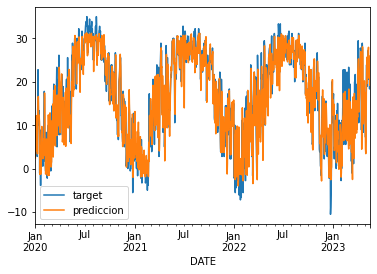

In [142]:
comparacion = pd.DataFrame({'target':test.target,'prediccion':pred_test})
comparacion.info()
comparacion.plot();
comp = comparacion.copy()

<AxesSubplot:xlabel='DATE'>

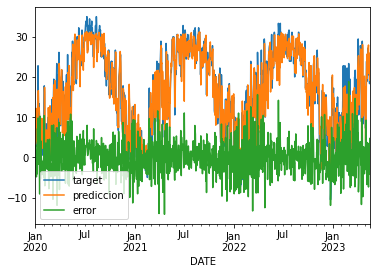

In [153]:
comp['error'] = comp['target'] - comp['prediccion']
comp["error_abs"] =abs(comp['error'])
comp[comp.columns.tolist()[:-1]].plot()

<AxesSubplot:xlabel='DATE'>

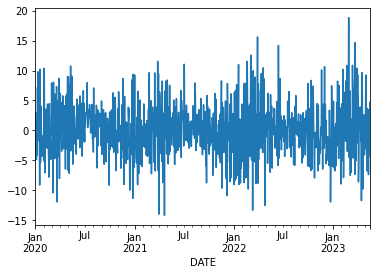

In [148]:
comp['error'].plot()

<AxesSubplot:xlabel='DATE'>

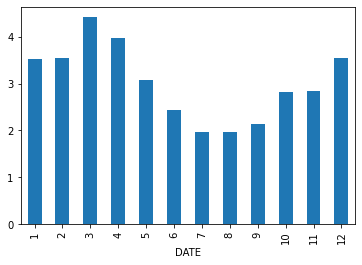

In [154]:
comp.groupby(comp.index.month)['error_abs'].mean().plot.bar()